In [ ]:
import requests
import pandas as pd

url = "http://www.inwea.org/wind-energy-in-india/wind-power-potential/"
html = requests.get(url).content
df_list = pd.read_html(html)
print(len(df_list))
df1,df2 = df_list
#Estimation of installable wind power potential at 80 m level,Estimation of installable wind power potential at 100 m level
df1.to_csv('small_data.csv')
df2.to_csv('big_data.csv')


2


In [ ]:
df1.head(10)

,0,1,2,3
0,Sl.No,States / UTs,Estimated potential (MW),Estimated potential (MW)
1,Sl.No,States / UTs,@ 50 m,@ 80 m (* #)
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh*,201,236
5,4,Assam*,53,112
6,5,Bihar,-,144
7,6,Chhattisgarh*,23,314
8,7,Dieu Damn,-,4
9,8,Gujarat,10609,35071


In [ ]:
df2.head(10)

,0,1,2,3,4
0,State,Rank I*,Rank II*,Rank III*,Total
1,Andaman & Nicobar,4.12,3.43,0.88,8.43
2,Andhra Pradesh,22525.50,20538.10,1165.00,44228.60
3,Chhattisgarh,3.24,57.03,16.31,76.59
4,Goa,0.00,0.08,0.76,0.84
5,Gujarat,52287.59,32037.83,105.09,84431.33
6,Karnataka,15202.36,39802.59,852.40,55857.36
7,Kerala,332.63,1102.56,264.38,1699.56
8,Lakshadweep,3.50,3.40,0.77,7.67
9,Madhya Pradesh,2216.39,8258.55,8.93,10483.88


In [ ]:
df1.describe()

,0,1,2,3
count,31,31,31,31
unique,30,30,27,30
top,Sl.No,States / UTs,-,16
freq,2,2,5,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       31 non-null     object
 1   1       31 non-null     object
 2   2       31 non-null     object
 3   3       31 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [ ]:
df = df1.iloc[2:]

In [ ]:
df.head(10)

,0,1,2,3
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh*,201,236
5,4,Assam*,53,112
6,5,Bihar,-,144
7,6,Chhattisgarh*,23,314
8,7,Dieu Damn,-,4
9,8,Gujarat,10609,35071
10,9,Haryana,-,93
11,10,Himachal Pradesh *,20,64


In [ ]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [ ]:
cols=["Sl","State","50m","80m"]
def merge_list_to_dict(test_keys,test_values):
  # using dictionary comprehension
  # to convert lists to dictionary
  merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
  return merged_dict
filt=merge_list_to_dict(df.columns,cols)

In [ ]:
df.rename(columns = filt, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,Sl,State,50m,80m
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh*,201,236
5,4,Assam*,53,112
6,5,Bihar,-,144


In [ ]:
# this will replace "-" with 0
df.replace(to_replace ="-", 
                 value =0,inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df.head()

,Sl,State,50m,80m
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh*,201,236
5,4,Assam*,53,112
6,5,Bihar,0,144


In [ ]:
df.to_csv('50-80.csv', index = False, header=True)

In [ ]:
df[["50m", "80m"]] = df[["50m", "80m"]].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data1=df

In [ ]:
# ten largest values in column Salary 
df.nlargest(11, ['80m']) 

,Sl,State,50m,80m
30,Total,Total,49130,102788
9,8,Gujarat,10609,35071
3,2,Andhra Pradesh,5394,14497
26,25,Tamil Nadu,5374,14152
14,13,Karnataka,8591,13593
18,17,Maharashtra,5439,5961
13,12,Jammu & Kashmir *,5311,5685
24,23,Rajasthan,5005,5050
17,16,Madhya Pradesh,920,2931
22,21,Orissa,910,1384


In [ ]:
# ten largest values in column Salary 
df.nlargest(11, ['50m']) 

,Sl,State,50m,80m
30,Total,Total,49130,102788
9,8,Gujarat,10609,35071
14,13,Karnataka,8591,13593
18,17,Maharashtra,5439,5961
3,2,Andhra Pradesh,5394,14497
26,25,Tamil Nadu,5374,14152
13,12,Jammu & Kashmir *,5311,5685
24,23,Rajasthan,5005,5050
17,16,Madhya Pradesh,920,2931
22,21,Orissa,910,1384


In [ ]:
df2.head()

,0,1,2,3,4
0,State,Rank I*,Rank II*,Rank III*,Total
1,Andaman & Nicobar,4.12,3.43,0.88,8.43
2,Andhra Pradesh,22525.50,20538.10,1165.00,44228.60
3,Chhattisgarh,3.24,57.03,16.31,76.59
4,Goa,0.00,0.08,0.76,0.84


In [ ]:
df = df2.iloc[1:]

In [ ]:
cols=["State","r1","r2","r3","100m"]
def merge_list_to_dict(test_keys,test_values):
  # using dictionary comprehension
  # to convert lists to dictionary
  merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
  return merged_dict
filt=merge_list_to_dict(df.columns,cols)
df.rename(columns = filt, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,State,r1,r2,r3,100m
1,Andaman & Nicobar,4.12,3.43,0.88,8.43
2,Andhra Pradesh,22525.50,20538.10,1165.00,44228.60
3,Chhattisgarh,3.24,57.03,16.31,76.59
4,Goa,0.00,0.08,0.76,0.84
5,Gujarat,52287.59,32037.83,105.09,84431.33


In [ ]:
# this will replace "-" with 0
df.replace(to_replace ="-", 
                 value =0,inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
df

,State,r1,r2,r3,100m
1,Andaman & Nicobar,4.12,3.43,0.88,8.43
2,Andhra Pradesh,22525.50,20538.10,1165.00,44228.60
3,Chhattisgarh,3.24,57.03,16.31,76.59
4,Goa,0.00,0.08,0.76,0.84
5,Gujarat,52287.59,32037.83,105.09,84431.33
6,Karnataka,15202.36,39802.59,852.40,55857.36
7,Kerala,332.63,1102.56,264.38,1699.56
8,Lakshadweep,3.50,3.40,0.77,7.67
9,Madhya Pradesh,2216.39,8258.55,8.93,10483.88
10,Maharashtra,31154.76,13747.43,492.15,45394.34


In [ ]:
df.shape

(18, 5)

In [ ]:
df[["r1", "r2", "r3","100m"]] = df[["r1", "r2", "r3","100m"]].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# this will replace "*" with blank
data1['State'] = data1['State'].str.rstrip('*')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1

,Sl,State,50m,80m
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh,201,236
5,4,Assam,53,112
6,5,Bihar,0,144
7,6,Chhattisgarh,23,314
8,7,Dieu Damn,0,4
9,8,Gujarat,10609,35071
10,9,Haryana,0,93
11,10,Himachal Pradesh,20,64


In [ ]:
"""cols_to_check = ['State']

data1[cols_to_check] = data1[cols_to_check].replace({'*':''},inplace=True)

data1"""

"cols_to_check = ['State']\n\ndata1[cols_to_check] = data1[cols_to_check].replace({'*':''},inplace=True)\n\ndata1"

In [ ]:
data1

,Sl,State,50m,80m
2,1,Andaman & Nicobar,2,365
3,2,Andhra Pradesh,5394,14497
4,3,Arunachal Pradesh,201,236
5,4,Assam,53,112
6,5,Bihar,0,144
7,6,Chhattisgarh,23,314
8,7,Dieu Damn,0,4
9,8,Gujarat,10609,35071
10,9,Haryana,0,93
11,10,Himachal Pradesh,20,64


In [ ]:
df

,State,r1,r2,r3,100m
1,Andaman & Nicobar,4.12,3.43,0.88,8.43
2,Andhra Pradesh,22525.50,20538.10,1165.00,44228.60
3,Chhattisgarh,3.24,57.03,16.31,76.59
4,Goa,0.00,0.08,0.76,0.84
5,Gujarat,52287.59,32037.83,105.09,84431.33
6,Karnataka,15202.36,39802.59,852.40,55857.36
7,Kerala,332.63,1102.56,264.38,1699.56
8,Lakshadweep,3.50,3.40,0.77,7.67
9,Madhya Pradesh,2216.39,8258.55,8.93,10483.88
10,Maharashtra,31154.76,13747.43,492.15,45394.34


In [ ]:
pd.merge(data1,df,on=['State'])

,Sl,State,50m,80m,r1,r2,r3,100m
0,1,Andaman & Nicobar,2,365,4.12,3.43,0.88,8.43
1,2,Andhra Pradesh,5394,14497,22525.50,20538.10,1165.00,44228.60
2,6,Chhattisgarh,23,314,3.24,57.03,16.31,76.59
3,8,Gujarat,10609,35071,52287.59,32037.83,105.09,84431.33
4,13,Karnataka,8591,13593,15202.36,39802.59,852.40,55857.36
5,14,Kerala,790,837,332.63,1102.56,264.38,1699.56
6,15,Lakshadweep,16,16,3.50,3.40,0.77,7.67
7,16,Madhya Pradesh,920,2931,2216.39,8258.55,8.93,10483.88
8,17,Maharashtra,5439,5961,31154.76,13747.43,492.15,45394.34
9,23,Rajasthan,5005,5050,15414.91,3342.62,12.96,18770.49


In [ ]:
#puducherry pondicherry
data=pd.merge(data1,df,on=['State'],how="outer")

In [ ]:
del data['Sl']

In [ ]:
data

,State,50m,80m,r1,r2,r3,100m
0,Andaman & Nicobar,2.0,365.0,4.12,3.43,0.88,8.43
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60
2,Arunachal Pradesh,201.0,236.0,NaN,NaN,NaN,NaN
3,Assam,53.0,112.0,NaN,NaN,NaN,NaN
4,Bihar,0.0,144.0,NaN,NaN,NaN,NaN
5,Chhattisgarh,23.0,314.0,3.24,57.03,16.31,76.59
6,Dieu Damn,0.0,4.0,NaN,NaN,NaN,NaN
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33
8,Haryana,0.0,93.0,NaN,NaN,NaN,NaN
9,Himachal Pradesh,20.0,64.0,NaN,NaN,NaN,NaN


In [ ]:
# this will replace NaN with 0
data=data.fillna(0)

In [ ]:
data["Total"]=data["50m"]+data["80m"]+data["100m"]

In [ ]:
data

,State,50m,80m,r1,r2,r3,100m,Total
0,Andaman & Nicobar,2.0,365.0,4.12,3.43,0.88,8.43,375.43
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60,64119.60
2,Arunachal Pradesh,201.0,236.0,0.00,0.00,0.00,0.00,437.00
3,Assam,53.0,112.0,0.00,0.00,0.00,0.00,165.00
4,Bihar,0.0,144.0,0.00,0.00,0.00,0.00,144.00
5,Chhattisgarh,23.0,314.0,3.24,57.03,16.31,76.59,413.59
6,Dieu Damn,0.0,4.0,0.00,0.00,0.00,0.00,4.00
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33,130111.33
8,Haryana,0.0,93.0,0.00,0.00,0.00,0.00,93.00
9,Himachal Pradesh,20.0,64.0,0.00,0.00,0.00,0.00,84.00


In [ ]:
data.to_csv('wind_data.csv', index = False, header=True)

In [ ]:
data=data.sort_values('Total',ascending=False)
data

,State,50m,80m,r1,r2,r3,100m,Total
33,Total in MW,0.0,0.0,153019.59,145742.59,3489.31,302251.49,302251.49
28,Total,49130.0,102788.0,0.00,0.00,0.00,0.00,151918.00
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33,130111.33
12,Karnataka,8591.0,13593.0,15202.36,39802.59,852.40,55857.36,78041.36
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60,64119.60
16,Maharashtra,5439.0,5961.0,31154.76,13747.43,492.15,45394.34,56794.34
24,Tamil Nadu,5374.0,14152.0,11251.48,22153.34,394.82,33799.65,53325.65
22,Rajasthan,5005.0,5050.0,15414.91,3342.62,12.96,18770.49,28825.49
15,Madhya Pradesh,920.0,2931.0,2216.39,8258.55,8.93,10483.88,14334.88
11,Jammu & Kashmir,5311.0,5685.0,0.00,0.00,0.00,0.00,10996.00


In [ ]:
data=data.iloc[2:]

In [ ]:
data

,State,50m,80m,r1,r2,r3,100m,Total
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33,130111.33
12,Karnataka,8591.0,13593.0,15202.36,39802.59,852.40,55857.36,78041.36
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60,64119.60
16,Maharashtra,5439.0,5961.0,31154.76,13747.43,492.15,45394.34,56794.34
24,Tamil Nadu,5374.0,14152.0,11251.48,22153.34,394.82,33799.65,53325.65
22,Rajasthan,5005.0,5050.0,15414.91,3342.62,12.96,18770.49,28825.49
15,Madhya Pradesh,920.0,2931.0,2216.39,8258.55,8.93,10483.88,14334.88
11,Jammu & Kashmir,5311.0,5685.0,0.00,0.00,0.00,0.00,10996.00
32,Telangana,0.0,0.0,887.43,3347.52,9.34,4244.29,4244.29
13,Kerala,790.0,837.0,332.63,1102.56,264.38,1699.56,3326.56


In [ ]:
data.to_csv('wind_data_sorted.csv', index = False, header=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


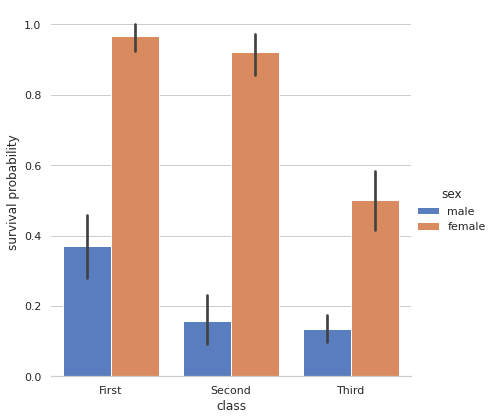

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

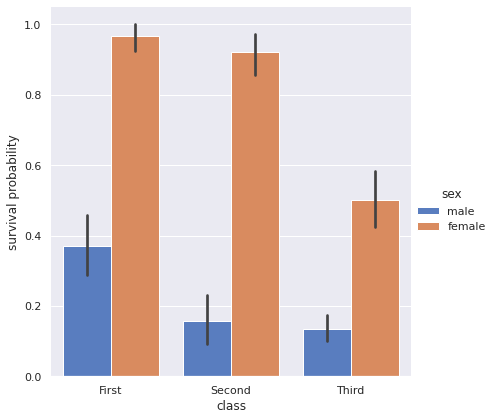

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

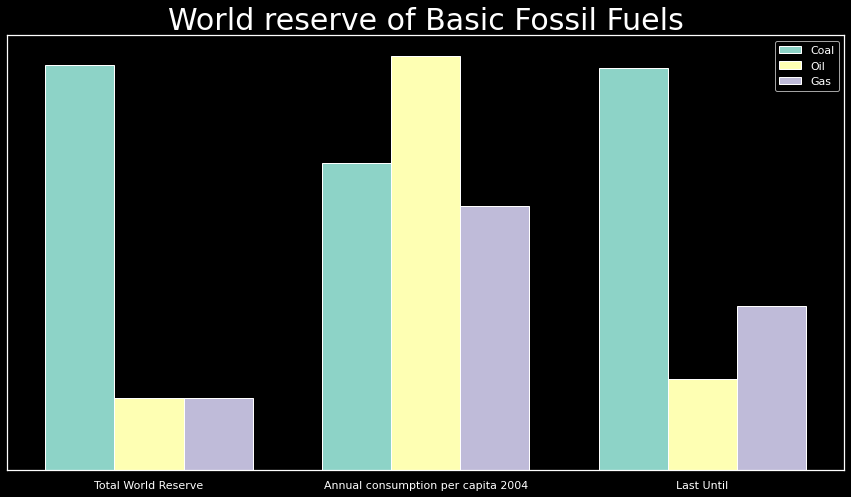

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N=3
Coal=[909064,0.43,2168]
Oil=[162135,0.58,2041]
Gas=[161577,0.37,2071]

#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

Coal=[0.909064,1.65*0.43,4.2*0.2168]
Oil=[0.162135,1.65*0.58,4.2*0.2041]
Gas=[0.161577,1.65*0.37,4.2*0.2071]



Coal=[0.909064,1.60*0.43,10*5.5*(0.2168-0.2004)]
Oil=[0.162135,1.60*0.58,10*5.5*(0.2041-0.2004)]
Gas=[0.161577,1.60*0.37,10*5.5*(0.2071-0.2004)]




plt.style.use('dark_background')

plt.figure(figsize=(15,8))

ind = np.arange(N) 
width1 = 0.25
width2= 0.25  
plt.bar(ind, Coal, width1, label='Coal')
plt.bar(ind + width1, Oil, width2,label='Oil')
plt.bar(ind + 2*width1, Gas, width2,label='Gas')
#plt.ylabel('Info')
plt.title('World reserve of Basic Fossil Fuels', fontsize=30)
plt.grid(False)

plt.xticks(ind + width1 , ('Total World Reserve', 'Annual consumption per capita 2004', 'Last Until'))
plt.yticks([])
plt.legend(loc='best')
#plt.legend(loc='center left', bbox_to_anchor=(1, 1),fancybox = True, shadow = True)
plt.show()

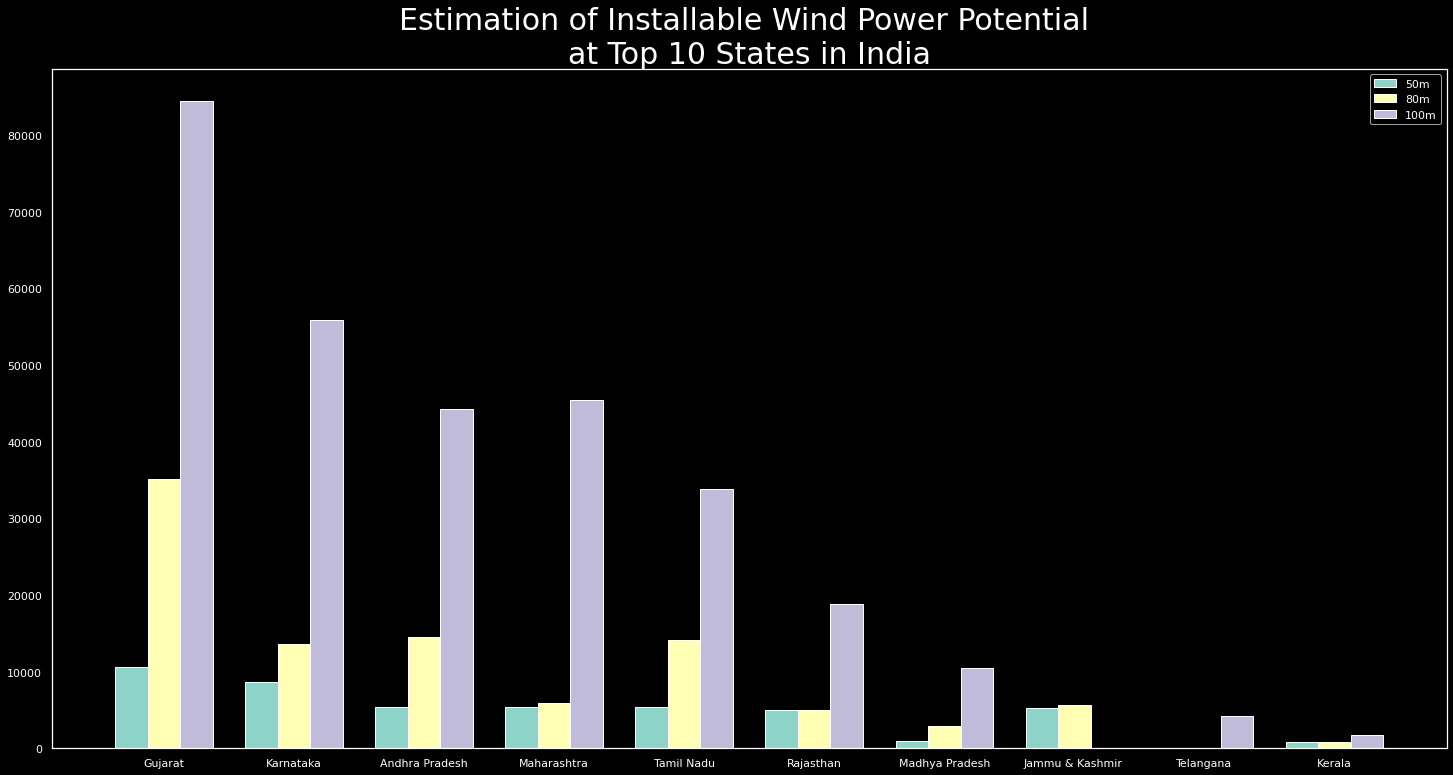

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df=data.iloc[:10]
N=len(df)
row1=df["50m"]
row2=df["80m"]
row3=df["100m"]

#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"


plt.style.use('dark_background')

plt.figure(figsize=(25,12.5))

ind = np.arange(N) 
width1 = 0.25
width2= 0.25  
plt.bar(ind, row1, width1, label='50m')
plt.bar(ind + width1, row2, width2,label='80m')
plt.bar(ind + 2*width1, row3, width2,label='100m')
#plt.ylabel('Info')
plt.title('Estimation of Installable Wind Power Potential \nat Top 10 States in India', fontsize=30)
plt.grid(False)

plt.xticks(ind + width1 , df["State"])
plt.rc('xtick',labelsize=16)
#plt.yticks([])
plt.legend(loc='best')
#plt.legend(loc='center left', bbox_to_anchor=(1, 1),fancybox = True, shadow = True)
plt.show()

In [ ]:
data

,State,50m,80m,r1,r2,r3,100m,Total
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33,130111.33
12,Karnataka,8591.0,13593.0,15202.36,39802.59,852.40,55857.36,78041.36
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60,64119.60
16,Maharashtra,5439.0,5961.0,31154.76,13747.43,492.15,45394.34,56794.34
24,Tamil Nadu,5374.0,14152.0,11251.48,22153.34,394.82,33799.65,53325.65
22,Rajasthan,5005.0,5050.0,15414.91,3342.62,12.96,18770.49,28825.49
15,Madhya Pradesh,920.0,2931.0,2216.39,8258.55,8.93,10483.88,14334.88
11,Jammu & Kashmir,5311.0,5685.0,0.00,0.00,0.00,0.00,10996.00
32,Telangana,0.0,0.0,887.43,3347.52,9.34,4244.29,4244.29
13,Kerala,790.0,837.0,332.63,1102.56,264.38,1699.56,3326.56


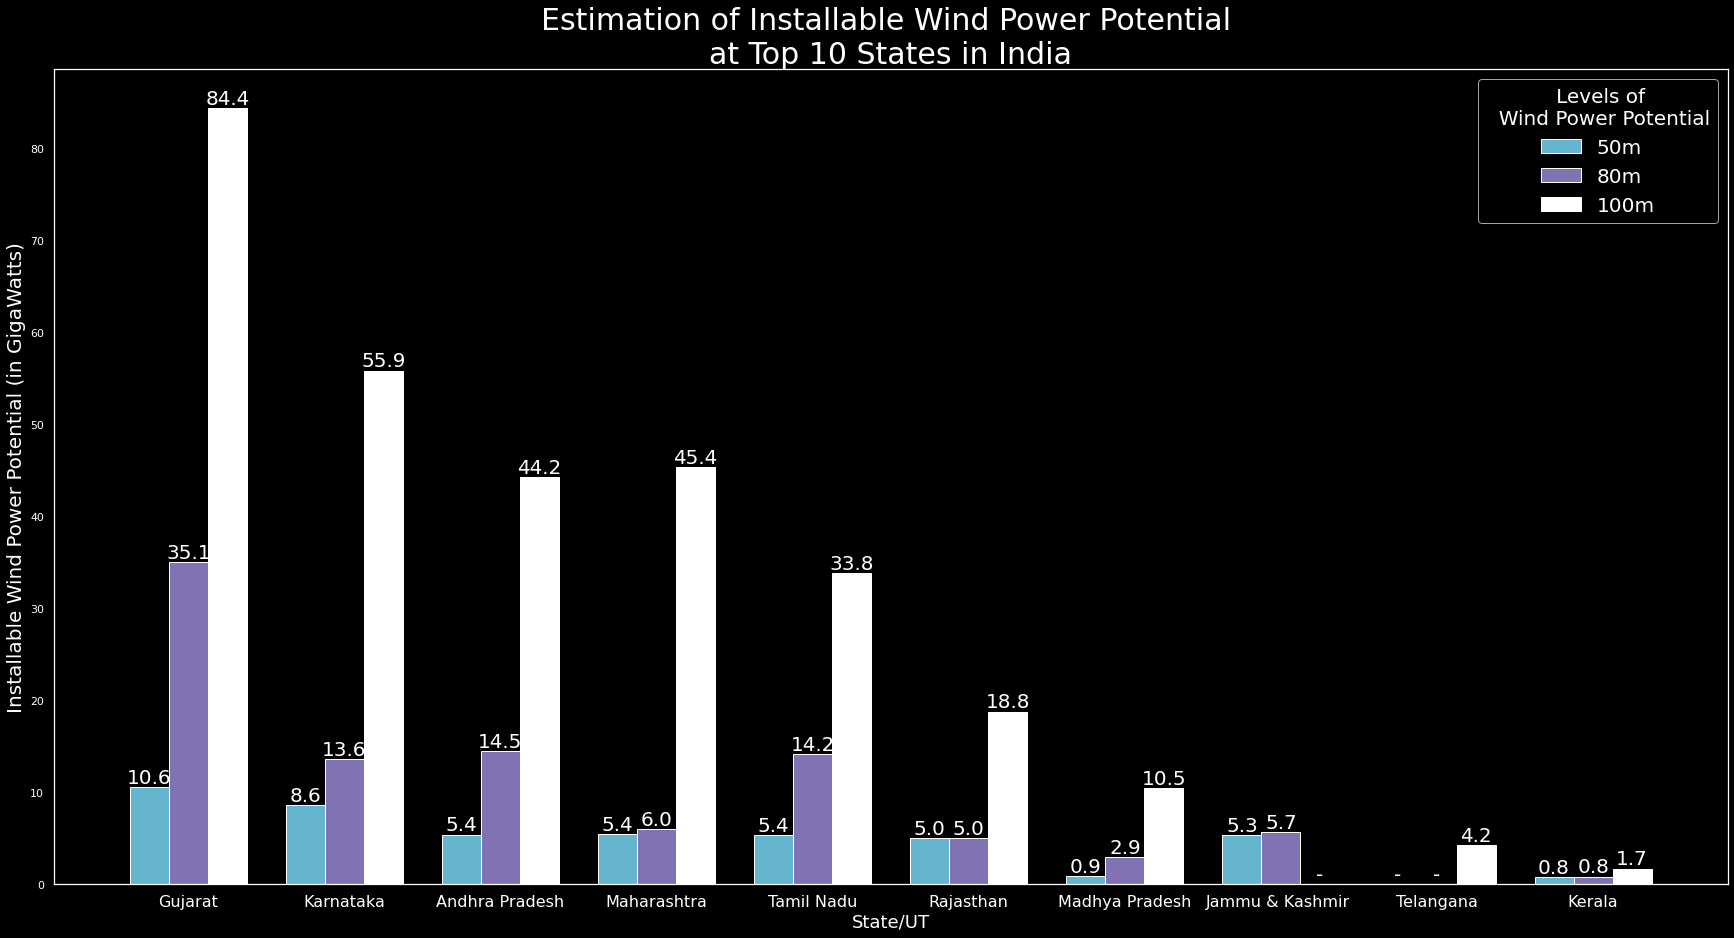

In [ ]:
df=data.iloc[:10]
N=len(df)
row1_=list(df["50m"]/1000)
row2_=list(df["80m"]/1000)
row3_=list(df["100m"]/1000)


#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"


row1=np.array(row1_)
row2=np.array(row2_)
row3=np.array(row3_)


#print(y)

plt.style.use('dark_background')

plt.figure(figsize=(30,15))

ind = np.arange(N) 
width1 = 0.25
width2 = 0.25

#colouring
#RGB is a way of making colors. You have to to provide an amount of red, green and blue + the transparency and it returns a color.
#color1=(0, 0, 1, 1)
#color2=(0, 1, 0, 1)
#color3=(1, 0, 0, 1)
"""
'b' 	blue
'g' 	green
'r' 	red
'c' 	cyan
'm' 	magenta
'y' 	yellow
'k' 	black
'w' 	white
"""


color1="c"
color2="m"
color3="w"

bar1=plt.bar(ind, row1, width1, label='50m',color=color1)
bar2=plt.bar(ind + width1, row2, width2,label='80m',color=color2)
bar3=plt.bar(ind + 2*width1, row3, width2,label='100m',color=color3)
#plt.ylabel('Info')
plt.title('Estimation of Installable Wind Power Potential \nat Top 10 States in India', fontsize=30)
plt.grid(False)



#plt.text(0, 0.8, str(1), color='white', fontweight='bold')

#for i, v in enumerate(y):
#plt.text(v + .25, i+ 3, str(v), color='blue', fontweight='bold')

for rect,val in zip(bar1+bar2+bar3,row1_+row2_+row3_):
    height = rect.get_height()
    #print(val)
    if(val==0):
      plt.text(rect.get_x() + rect.get_width()/2.0, height+0.01, str("-"), ha='center', va='bottom',fontsize=20)
    else:
      plt.text(rect.get_x() + rect.get_width()/2.0, height+0.01, str(round(val,1)), ha='center', va='bottom',fontsize=20)


#plt.ylim(0,1)

#plt.text(v + .25, i+ 3, str(v), color='blue', fontweight='bold')

plt.xticks(ind + width1 , df["State"])
#plt.rc('xtick',labelsize=16)
#plt.rc('ytick',labelsize=16)
"""plt.xticks(ind + width , ('Total World Reserve \n (Solids-$10^6$ t) \n (Fluids-Mtoe)',
                          'Annual consumption per capita 2004 \n (Unit-toe)',
                          ' Will Last Until \n (Year) \n (Ref. by 2004)'))
                          """
#plt.yticks([])
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

plt.xlabel('State/UT', fontsize=18)
plt.ylabel('Installable Wind Power Potential (in GigaWatts)', fontsize=20)

lg=plt.legend(loc='best',title='           Levels of \n  Wind Power Potential', prop={'size': 20})
lg.get_title().set_fontsize(20)
lg._legend_box.align = "center"
#plt.legend(loc='center left', bbox_to_anchor=(1, 1),fancybox = True, shadow = True)
plt.savefig("wind_power_potential_final.png" ,dpi=100)
plt.show()


#print(bar1+bar2+bar3)

In [ ]:
data

,State,50m,80m,r1,r2,r3,100m,Total
7,Gujarat,10609.0,35071.0,52287.59,32037.83,105.09,84431.33,130111.33
12,Karnataka,8591.0,13593.0,15202.36,39802.59,852.40,55857.36,78041.36
1,Andhra Pradesh,5394.0,14497.0,22525.50,20538.10,1165.00,44228.60,64119.60
16,Maharashtra,5439.0,5961.0,31154.76,13747.43,492.15,45394.34,56794.34
24,Tamil Nadu,5374.0,14152.0,11251.48,22153.34,394.82,33799.65,53325.65
22,Rajasthan,5005.0,5050.0,15414.91,3342.62,12.96,18770.49,28825.49
15,Madhya Pradesh,920.0,2931.0,2216.39,8258.55,8.93,10483.88,14334.88
11,Jammu & Kashmir,5311.0,5685.0,0.00,0.00,0.00,0.00,10996.00
32,Telangana,0.0,0.0,887.43,3347.52,9.34,4244.29,4244.29
13,Kerala,790.0,837.0,332.63,1102.56,264.38,1699.56,3326.56


In [ ]:
df=data[["50m","80m","100m"]]
df

,50m,80m,100m
7,10609.0,35071.0,84431.33
12,8591.0,13593.0,55857.36
1,5394.0,14497.0,44228.60
16,5439.0,5961.0,45394.34
24,5374.0,14152.0,33799.65
22,5005.0,5050.0,18770.49
15,920.0,2931.0,10483.88
11,5311.0,5685.0,0.00
32,0.0,0.0,4244.29
13,790.0,837.0,1699.56


In [ ]:
df = df[~(df == 0).any(axis=1)]
df

,50m,80m,100m
7,10609.0,35071.0,84431.33
12,8591.0,13593.0,55857.36
1,5394.0,14497.0,44228.60
16,5439.0,5961.0,45394.34
24,5374.0,14152.0,33799.65
22,5005.0,5050.0,18770.49
15,920.0,2931.0,10483.88
13,790.0,837.0,1699.56
5,23.0,314.0,76.59
0,2.0,365.0,8.43


In [ ]:
df.values

array([[1.060900e+04, 3.507100e+04, 8.443133e+04],
       [8.591000e+03, 1.359300e+04, 5.585736e+04],
       [5.394000e+03, 1.449700e+04, 4.422860e+04],
       [5.439000e+03, 5.961000e+03, 4.539434e+04],
       [5.374000e+03, 1.415200e+04, 3.379965e+04],
       [5.005000e+03, 5.050000e+03, 1.877049e+04],
       [9.200000e+02, 2.931000e+03, 1.048388e+04],
       [7.900000e+02, 8.370000e+02, 1.699560e+03],
       [2.300000e+01, 3.140000e+02, 7.659000e+01],
       [2.000000e+00, 3.650000e+02, 8.430000e+00],
       [2.200000e+01, 2.200000e+01, 2.080000e+00],
       [1.600000e+01, 1.600000e+01, 7.670000e+00]])